In [1]:
# Official packages
import os
import copy

# Third-party packages
import numpy as np
import matplotlib.pyplot as plt

# In-house packages
from BrukerSpSpEpi import BrukerSpSpEpiExp


In [2]:
exp_dir = "../20230305_163320_AgroseCylinder2_1_1"
exp_nbr = 21
        
spsp_epi = BrukerSpSpEpiExp(exp_dir, exp_nbr)

def zerofill_fid_2d(fid_2d):
    nbr_zerofill_lines = spsp_epi._exp_data_dim_dict['dim_r_image_ph'] - spsp_epi._exp_data_dim_dict['dim_k_raw_ph']
    zerofilled_fid_2d = np.pad(fid_2d, ((nbr_zerofill_lines, 0),(0, 0)), 'constant', constant_values=(0))
    return zerofilled_fid_2d

def split_fid_2d(fid_2d):
    fid_left = fid_2d[...,:spsp_epi._exp_data_dim_dict['dim_k_raw_ro']:]
    fid_right = fid_2d[...,spsp_epi._exp_data_dim_dict['dim_k_raw_ro']::]
    return fid_left, fid_right

def mirror_odd_lines(fid_2d):
    mirrored_fid_2d = copy.deepcopy(fid_2d)
    for line_nbr, line in enumerate(mirrored_fid_2d):
        if (line_nbr % 2 ):
             mirrored_fid_2d[line_nbr] = line[::-1,...]
    return mirrored_fid_2d

def synthesize_phase_conjugate_fid_2d(fid_2d):
    synthesized_fid_2d = copy.deepcopy(fid_2d)
    for line_idx, line in enumerate(fid_2d):
        if (not line.any()):
            line = zerofilled_fid_2d[-1*line_idx]
            synthesized_fid_2d[line_idx] = line[::-1]
    return synthesized_fid_2d

def align_echo_center(fid_2d):
    aligned_fid_2d = copy.deepcopy(fid_2d)
    for idx, line in enumerate(fid_2d):
        shift = 60 - np.argmax(np.abs(line))
        aligned_fid_2d[idx] = np.roll(line, shift)
    return aligned_fid_2d

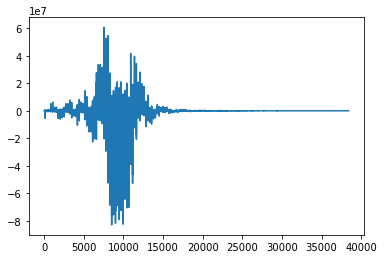

In [3]:
plt.plot((spsp_epi.fid['raw']))

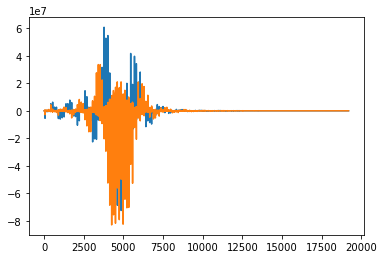

In [4]:
plt.plot(np.real(spsp_epi.fid['deserialized']))
plt.plot(np.imag(spsp_epi.fid['deserialized']))

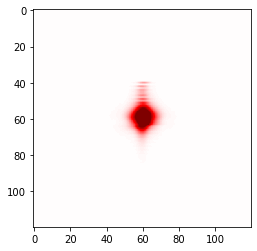

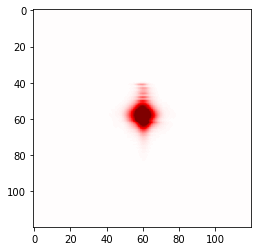

In [5]:
plt.figure()
plt.imshow(np.abs(spsp_epi.k_space_data['deg0']), cmap="seismic", vmin=-1*2**25, vmax=2**25)

plt.figure()
plt.imshow(np.abs(spsp_epi.k_space_data['deg90']), cmap="seismic", vmin=-1*2**25, vmax=2**25)


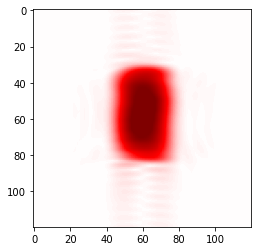

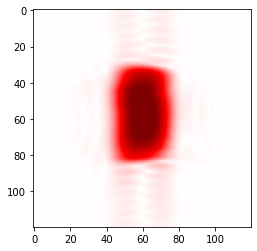

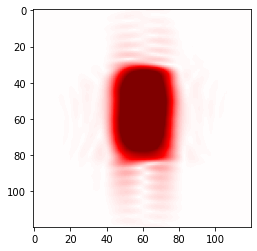

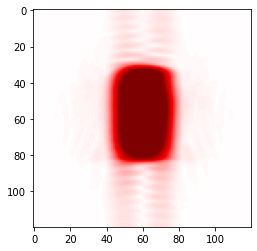

In [6]:
plt.figure()
plt.imshow(np.abs(spsp_epi.r_space_data['deg0']), cmap="seismic", vmin=-1*2**31, vmax=2**31)

plt.figure()
plt.imshow(np.abs(spsp_epi.r_space_data['deg90']), cmap="seismic", vmin=-1*2**31, vmax=2**31)

plt.figure()
plt.imshow(np.abs(spsp_epi.r_space_data['deg0'] + spsp_epi.r_space_data['deg90']), cmap="seismic", vmin=-1*2**31, vmax=2**31)

plt.figure()
plt.imshow(np.abs(spsp_epi.r_space_data['deg0']) + np.abs(spsp_epi.r_space_data['deg90']), cmap="seismic", vmin=-1*2**31, vmax=2**31)
